In [1]:
import numpy as np 
import librosa 
import matplotlib.pyplot as plt
import glob 
import os 
import librosa.display
from sklearn.preprocessing import minmax_scale
import soundfile as sf
from IPython.display import Audio
plt.style.use('ggplot')

### Découpage automatique des pistes audio 
* On a besoin de découper automatiquement les pistes audio pour déterminer des features significatives. 
* C'est terriblement pénible de faire plusieurs pistes ou de les découper manuellemenent
* On utilise l'énergie du signal pour identifier un seuil et découper automatiquement le signal 
* Calcul de l'énergie: 
$$rmse = \sum_n |x(n)|^2$$

In [2]:
files = sorted(glob.glob('./res/aeiou/*.wav'))
print(files)

['./res/aeiou/Dodo.wav', './res/aeiou/Hugo.wav', './res/aeiou/Louis.wav', './res/aeiou/florian.wav', './res/aeiou/jonathan.wav']


### Visualisation de l'energie 

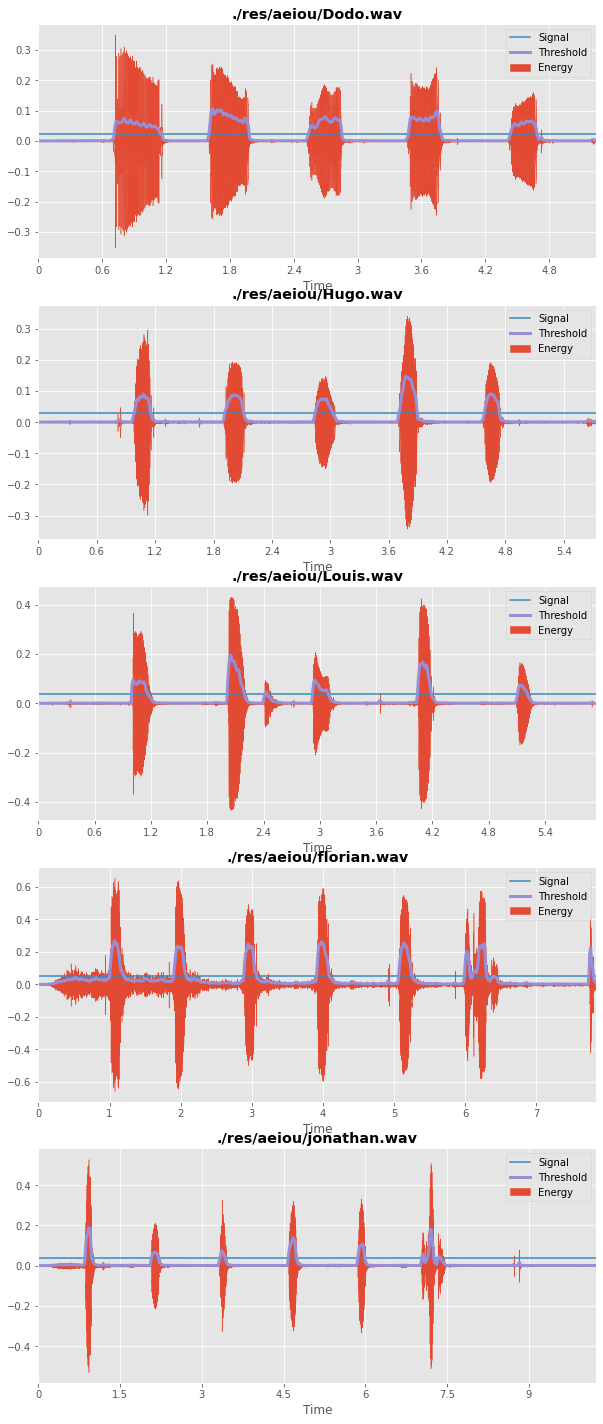

In [3]:
f, axes = plt.subplots(len(files), 1, figsize = (10,5*len(files)))
axes = axes.flatten()
frame_length = 512
hop_length = 256

for file, ax in zip(files, axes): 
    x, sr = librosa.load(file)
    librosa.display.waveplot(x, ax = ax)
    ax.set_title(file, weight = 'bold')
    
    energy = np.array([
        sum(abs(x[frame:frame + frame_length]**2)) for frame in range(0,len(x), hop_length)
    ])
    rmse = librosa.feature.rms(x, 
                                frame_length = frame_length, 
                                hop_length = hop_length, 
                                center = True)
    t =librosa.frames_to_time(range(len(rmse.flatten())), sr = sr, hop_length = hop_length)
    th = 0.1 
    ax.plot(t, np.ones_like(t) * np.max(rmse)* 0.2)
    ax.plot(t, rmse.flatten(), linewidth = 3)
    ax.legend(['Signal', 'Threshold', 'Energy'])

In [12]:
def split_sound(fname, out_dir ='./res/split', th = 0.3): 
    
    if not os.path.exists(out_dir): 
        os.mkdir(out_dir)
    
    x, sr = librosa.load(fname)
    rmse = librosa.feature.rms(x, frame_length = frame_length, hop_length = hop_length, center = True).flatten()
    speaking = False
    started = 0
    utterances = []
    # FIND SAMPLES IDX 
    for i in range(rmse.shape[0]): 
        if rmse[i] > th * np.max(rmse): 
            if not speaking: 
                speaking = True 
                started = i
        else: 
            if speaking: 
                speaking = False
                sample_start = librosa.frames_to_samples(started, hop_length = hop_length)
                sample_end = librosa.frames_to_samples(i, hop_length = hop_length)
                utterances.append([sample_start, sample_end])

    # SPLIT 
    f_names = 'a,e,i,o,u,y'.split(',')
    for i,utterance in enumerate(utterances): 
        s = np.max([utterance[0]-100, 0])
        e = np.min([utterance[1]+100, x.shape[0]])
        sub_x = x[s:e]
        path = os.path.dirname(fname)
        speaker = os.path.basename(fname).split('.')[0]
        if i >= 5: 
            break
        sf.write(os.path.join(out_dir,'{}_{}.wav'.format(f_names[i],speaker.lower())), 
                 sub_x, samplerate = sr)
        

for file in files: 
    split_sound(file)
    

/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [13]:
files = glob.glob('./res/aeiou/*.mp3')

In [14]:
target_folder = './res/same_person'
for file in files: 
    split_sound(file, out_dir = target_folder)

/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
Audio('res/split/e_dodo.wav')

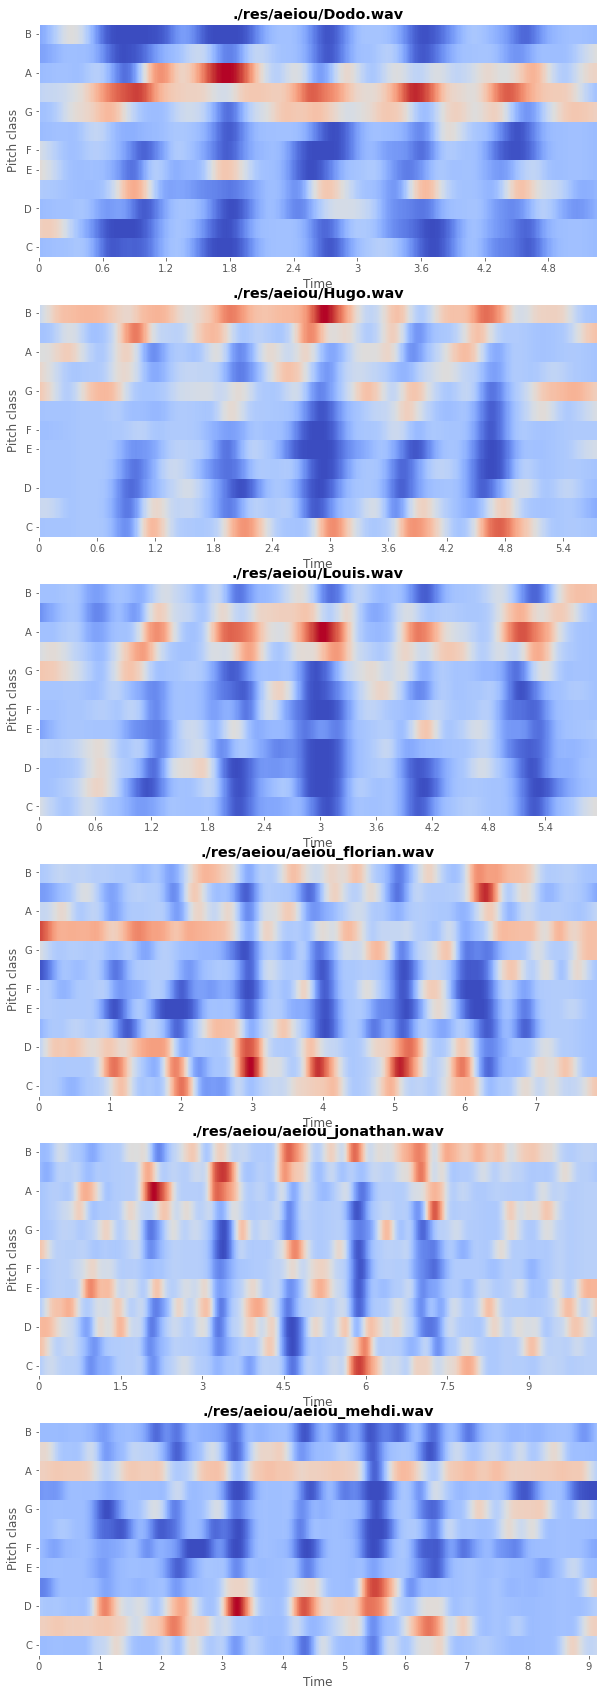

In [48]:
f, axes = plt.subplots(len(files), 1, figsize = (10, 5*len(files)))
axes = axes.flatten()
frame_length = 512
hop_length = 256

for file, ax in zip(files, axes): 
    x, sr = librosa.load(file)
    ax.set_title(file, weight = 'bold')
    chroma = librosa.feature.chroma_cens(x, sr = sr, hop_length = hop_length)
    librosa.display.specshow(chroma, ax = ax, x_axis = 'time', y_axis = 'chroma' , cmap = 'coolwarm', hop_length = hop_length)
   